Project OverView

Our dataset model provide the outcome (also known as the "ground truth") for each passenger. Our model will be based on "features" such as the gender and class of the passengers. Feature engineering can also be used to create new features. The dataset should be used to determine how well our model performs on previously unseen data. We do not provide ground truth for each passenger in the test set. It is our responsibility to forecast these outcomes. We use the model to train predict whether or not each passenger in the Titanic set survived the Titanic's sinking. We also include a set of predictions that assume only male and only female passengers survive.

Dataset overview

This is the original data from Titanic competition.

Drop the Name, Ticket and Cabin Columns.
To replace missing values with interpolated values, for example Age.
Drop all rows with missin data
Create dummy columns from the Embarked and Sex columns
Add those dummy columns to the original dataset.
Drop the original categorical columns.
Seperate the dataframe into X and y data.
Split the dataset into 70% Training and 30% Test.
URL - https://www.kaggle.com/competitions/titanic/data

In [26]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/titanic.csv", engine='python')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df[[col for col in df.columns if not col in cols_to_drop]]

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 9 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Sex          891 non-null    object 

 4   Age          714 non-null    float64

 5   SibSp        891 non-null    int64  

 6   Parch        891 non-null    int64  

 7   Fare         891 non-null    float64

 8   Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(2)

memory usage: 62.8+ KB


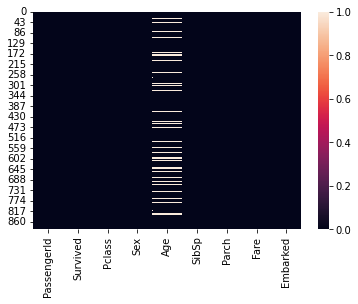

In [ ]:
df.info()
sb.heatmap(df.isnull())

In [ ]:
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()

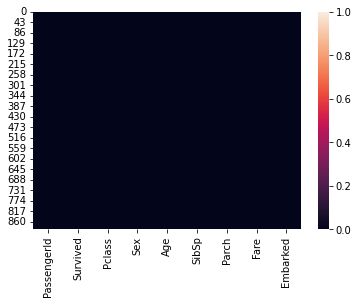

In [ ]:
sb.heatmap(df.isnull())

In [ ]:
# Drop all rows with missin data
df = df.dropna()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 889 entries, 0 to 890

Data columns (total 9 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  889 non-null    int64  

 1   Survived     889 non-null    int64  

 2   Pclass       889 non-null    int64  

 3   Sex          889 non-null    object 

 4   Age          889 non-null    float64

 5   SibSp        889 non-null    int64  

 6   Parch        889 non-null    int64  

 7   Fare         889 non-null    float64

 8   Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(2)

memory usage: 69.5+ KB


In [ ]:
# First, create dummy columns from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [ ]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [ ]:
# Drop the redundant columns thus converted
df = df.drop(['Sex','Embarked'],axis=1)

In [ ]:
# Seperate the dataframe into X and y data
X = df.values
y = df['Survived'].values

In [ ]:
# Delete the Survived column from X
X = np.delete(X,1,axis=1)

In [ ]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

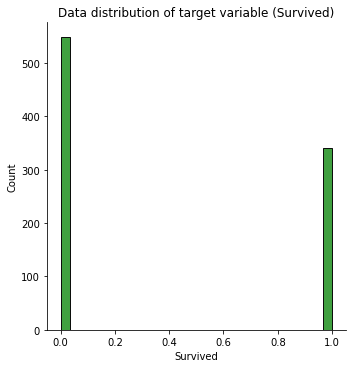

In [27]:
# Let's use the displot function from the seaborn
# to visualise data distribution of the target variable.with sb.axes_style('darkgrid'):
sb.displot(df['Survived'], bins=30, color='green')
plt.title("Data distribution of target variable (Survived)");

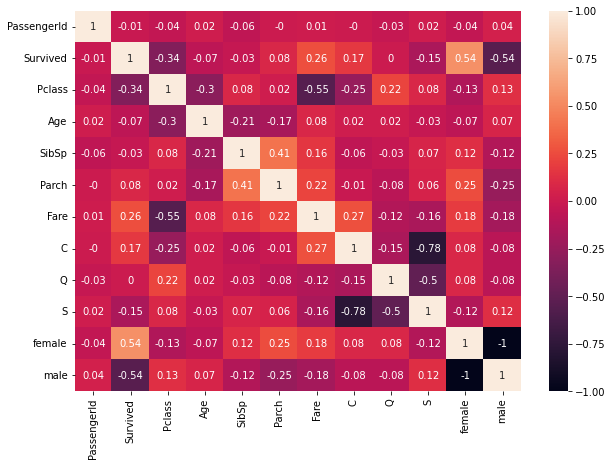

In [28]:
# corr() to calculate the correlation between variables
correlation_matrix = df.corr().round(2)
# changing the figure size
plt.figure(figsize = (10, 7))
# "annot = True" to print the values inside the square
sb.heatmap(data=correlation_matrix, annot=True);

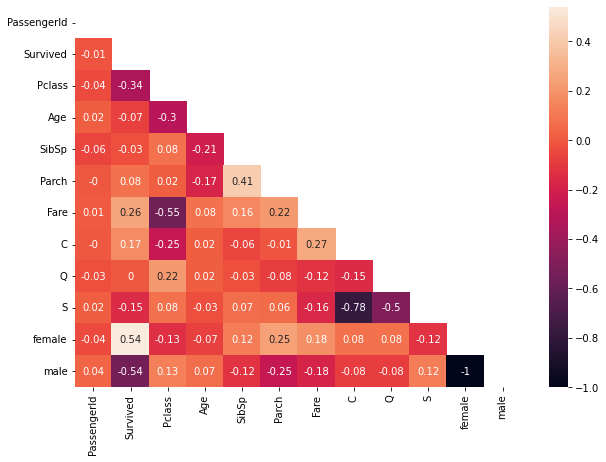

In [29]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (10, 7))
# "annot = True" to print the values inside the square
sb.heatmap(data=correlation_matrix, annot=True, mask=mask);

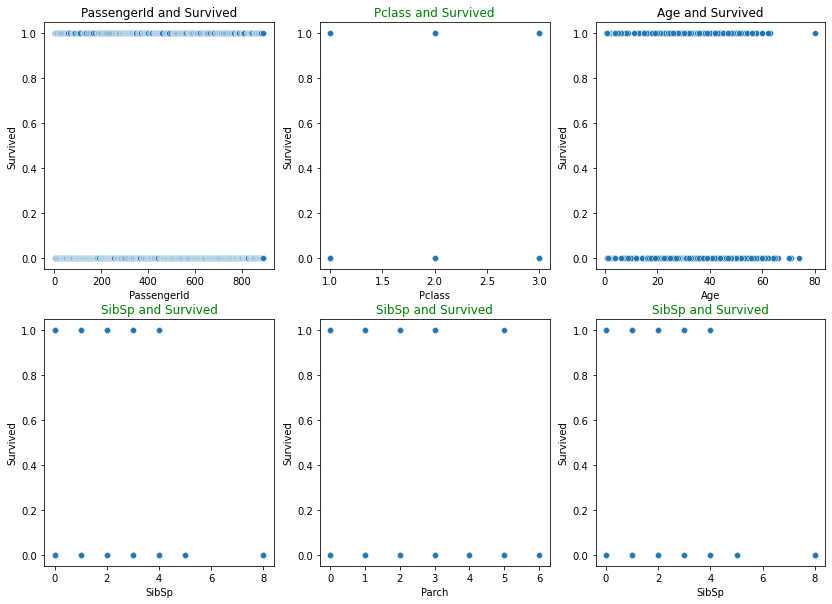

In [39]:
# Let's create plots to see the relationships
# between feature variables and target varable
plt.figure(figsize=(14,10))
# Relatiosnship with 'PasengerId' and 'Survived'
plt.subplot(2, 3, 1)
sb.scatterplot(x=df['PassengerId'], y=df['Survived'])
plt.title("PassengerId and Survived")
# Relatiosnship with 'Pclass' and 'SURVIVED'
plt.subplot(2, 3, 2)
sb.scatterplot(x=df['Pclass'], y=df['Survived'])
plt.title("Pclass and Survived", color='green')
# Relatiosnship with 'Age' and 'Survived'
plt.subplot(2, 3, 3)
sb.scatterplot(x=df['Age'], y=df['Survived'])
plt.title("Age and Survived")
# Relatiosnship with 'SibSp' and 'Survived'
plt.subplot(2, 3, 4)
sb.scatterplot(x=df['SibSp'], y=df['Survived']);
plt.title("SibSp and Survived", color='green')
# Relatiosnship with 'Parch' and 'Survived'
plt.subplot(2, 3, 5)
sb.scatterplot(x=df['Parch'], y=df['Survived']);
plt.title("SibSp and Survived", color='green');

## **Decision Tree**

In [40]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
score_dt = dt_clf.score(X_test, y_test)
print(score_dt)
score = set()
score.add(('DT', score_dt))

0.7827715355805244


In [41]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[136,  21],
       [ 37,  73]])

## **Build a Naive Bayes Classifier**

In [43]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
score_nb = nb_clf.score(X_test, y_test)
print(score_nb)
score.add(('NB', score_nb))

0.7602996254681648


## **K-Nearest Neighbors**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
score_knn = knn_clf.score(X_test, y_test)
print(score_knn)
score.add(('KNN', score_knn))

0.5805243445692884


## **Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression 
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(X_train, y_train)
score_lr = lr_clf.score(X_test, y_test)
print(score_lr)
score.add(('LR', score_lr))

0.7677902621722846


## **SVM**

In [47]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(X_train, y_train)
score_sv = sv_clf.score(X_test, y_test)
print(score_sv)
score.add(('SVM', score_sv))

0.7715355805243446


## **Comparison among the clasifiers**

In [49]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
    print(s)

The accuracy scores of different Models:

----------------------------------------

('NB', 0.7602996254681648)

('LR', 0.7677902621722846)

('SVM', 0.7715355805243446)

('KNN', 0.5805243445692884)

('DT', 0.7827715355805244)


As we can see that all the models have accuracy score more than 58% .

Discussion and Conclusion: As we can see that, Decision Tree has the highest score (0.7827715355805244) among all the models and KNN has the lowest score (0.5805243445692884).

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours. The Seaborn package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator's requirement.
Interpolation is a technique in Python used to estimate unknown data points between two known data points. Interpolation is mostly used to impute missing values in the dataframe or series while preprocessing data.
Concatenate pandas objects along a particular axis with optional set logic along the other axes. Can also add a layer of hierarchical indexing on the concatenation axis, which may be useful if the labels are the same (or overlapping) on the passed axis number.